# Genetic Algorithm for Feature Selection

## Import Libraries

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

np.random.seed(2019)

## Load data

In [17]:
data = pd.read_csv('mushroom.csv')

In [18]:
data.head()

,Cap-shape,Cap-surface,Cap-color,bruises?,odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,population,habitat,classes
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [19]:
data.describe()

,Cap-shape,Cap-surface,Cap-color,bruises?,odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,population,habitat,classes
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
Cap-shape                   8124 non-null object
Cap-surface                 8124 non-null object
Cap-color                   8124 non-null object
bruises?                    8124 non-null object
odor                        8124 non-null object
Gill-attachment             8124 non-null object
Gill-spacing                8124 non-null object
Gill-size                   8124 non-null object
Gill-color                  8124 non-null object
Stalk-shape                 8124 non-null object
Stalk-root                  8124 non-null object
Stalk-surface-above-ring    8124 non-null object
Stalk-surface-below-ring    8124 non-null object
Stalk-color-above-ring      8124 non-null object
Stalk-color-below-ring      8124 non-null object
Veil-type                   8124 non-null object
Veil-color                  8124 non-null object
Ring-number                 8124 non-null object
Ring-type  

In [21]:
features = list(data.columns.values)

In [22]:
for c in data.columns:
    if data[c].dtype =='object':
        enc = LabelEncoder()
        enc.fit(list(data[c].values))
        data[c] = enc.transform(list(data[c].values))

In [23]:
X = data.iloc[:, :22].values
y = data.iloc[:, 22].values

In [24]:
len(X[0])

22

## Train test splitting

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Classification

In [26]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

In [28]:
accuracy

0.9261469600895188

In [29]:
data.corr()

,Cap-shape,Cap-surface,Cap-color,bruises?,odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,population,habitat,classes
Cap-shape,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,...,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221,0.052951
Cap-surface,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,...,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887,0.178446
Cap-color,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,...,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925,-0.031384
bruises?,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,...,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095,-0.501530
odor,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,...,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610,-0.093552
Gill-attachment,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,...,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304,0.129200
Gill-spacing,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,...,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680,-0.348387
Gill-size,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,...,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418,0.540024
Gill-color,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,...,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972,-0.530566
Stalk-shape,0.063794,-0.014123,-0.456496,0.099364,0.459766,0.186485,0.080895,0.214576,-0.175699,1.000000,...,0.223439,0.235794,NaN,0.162604,-0.293221,-0.291444,0.258831,0.087383,-0.269216,-0.102019


## Genetic Algorithm Class

In [43]:
class GA():
    def __init__(self,estimator, numberGenerations, numberBestChromosomes, numberRandomChromosomes, numberChildren, mutationRate):
        self.estimator = estimator
        self.generationAccuracyList = []
        self.generationFeatureList = []
        self.numberGenetations = numberGenerations
        self.numberBestChromosomes = numberBestChromosomes
        self.numberRandomChromosomes = numberRandomChromosomes
        self.numberChildren = numberChildren
        self.mutationRate = mutationRate
        self.sizeChromosomes = (int((self.numberBestChromosomes+self.numberRandomChromosomes)/2)*self.numberChildren)
        
        if int((self.numberBestChromosomes+self.numberRandomChromosomes)/2)*self.numberChildren != self.sizeChromosomes:
            print('LHS = (('+str(self.numberBestChromosomes)+\
                  ' + '+str(self.numberRandomChromosomes)+')/2)*'+str(self.numberChildren)+' = '+str(int((self.numberBestChromosomes+self.numberRandomChromosomes)/2)*self.numberChildren))
            print('RHS = '+str(self.sizeChromosomes))
            raise ValueError("Unstable population size")
    
    def initializePopulation(self):
        self.maxAccuracy = 0
        self.maxAccuracySubset = [True]*(self.numberFeatures)
        population = []
        for i in range(self.sizeChromosomes):
            chromosomes = np.ones(self.numberFeatures, dtype=np.bool)
            mask = np.random.rand(len(chromosomes))<0.3
            chromosomes[mask] = False
            population.append(chromosomes)
        return population
    
    def fitness(self,population):
        X, y = self.dataset
        localMaxAccuracy = 0
        localMaxAccuracySubset = None
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
        fitness = []
        for child in population:
            try:
                accuracy = accuracy_score(GaussianNB().fit(X_train[:,child],y_train).predict(X_test[:,child]),y_test)
                accuracy = accuracy
                fitness.append(accuracy)
                if float(accuracy)>float(localMaxAccuracy):
                    localMaxAccuracy = accuracy
                    localMaxAccuracySubset = child
                if float(localMaxAccuracy)>float(self.maxAccuracy):
                    self.maxAccuracy = localMaxAccuracy
                    self.maxAccuracySubset = localMaxAccuracySubset
            except:
                fitness.append(0)
        #print('Local Max Accuracy = ',localMaxAccuracy)
        #print('Local Max Accuracy Subset = ',localMaxAccuracySubset)

        self.generationAccuracyList.append(localMaxAccuracy*100)
        cnt = 0
        for i in range(len(localMaxAccuracySubset)):
            if localMaxAccuracySubset[i] == True:
                cnt+=1
        self.generationFeatureList.append(cnt)
        
        #print('Max Accuracy = ',self.maxAccuracy)
        #print('Max Accuracy Subset = ',self.maxAccuracySubset)
        
        fitness, population = np.array(fitness), np.array(population)
        indx = np.argsort(-1*fitness)
        return list(fitness[indx]),list(population[indx,:])
    
    def selectNextPopulation(self,population):
        populationNext = []
        for i in range(self.numberBestChromosomes):
            populationNext.append(population[i])
        for i in range(self.numberRandomChromosomes):
            populationNext.append(random.choice(population))
        random.shuffle(populationNext)
        return populationNext
    
    def crossover(self,population):
        populationNext = []
        for i in range(int(len(population)/2)):
            for j in range(self.numberChildren):
                child1, child2 = population[i], population[len(population)-1-i]
                child = child1
                mask = np.random.rand(len(child))>0.5
                child[mask] = child2[mask]
                populationNext.append(child)
        return populationNext
    
    def mutate(self,population):
        populationNext = []
        for i in range(len(population)):
            chromosomes = population[i]
            if random.random() < self.mutationRate:
                mask = np.random.rand(len(chromosomes)) < 0.05
                chromosomes[mask] = False
            populationNext.append(chromosomes)
        return populationNext
    
    def generatePopulation(self,population):
        sortedFitness, sortedPopulation = self.fitness(population)
        population = self.selectNextPopulation(sortedPopulation)
        population = self.crossover(population)
        population = self.mutate(population)
        
        self.bestChromosomes.append(sortedPopulation[0])
        self.bestFitness.append(sortedFitness[0])
        self.avgFitness.append(np.mean(sortedFitness))
        return population
    
    def fit(self,attributes,target):
        self.bestChromosomes, self.bestFitness, self.avgFitness = [], [], []
        
        self.numberFeatures = attributes.shape[1]
        self.dataset = attributes,target
        
        population = self.initializePopulation()
        for i in range(self.numberGenetations):
            population = self.generatePopulation(population)
        
        return self
    
    @property
    def supportProp(self):
        return self.bestChromosomes[-1]
    
    def getMaxAccuracySubset(self):
        featureList = []
        for i in range((self.numberFeatures)):
            if self.maxAccuracySubset[i] == True:
                featureList.append(list(data.columns)[i])
        return featureList
    
    def plotFitness(self):
        plt.plot(self.generationAccuracyList, label='Fitness')
        plt.plot(self.generationFeatureList, label='Features')
        #plt.plot(self.avgFitness, label='Average')
        #plt.plot(self.bestFitness, label='Best')
        plt.legend()
        plt.ylabel('Fitness/Number of Features')
        plt.xlabel('Generation')
        plt.show()

In [44]:
obj = GA(estimator=GaussianNB(), numberGenerations=200,numberBestChromosomes=50, numberRandomChromosomes=20, numberChildren=25, mutationRate=0.1)

In [45]:
obj.fit(X,y)

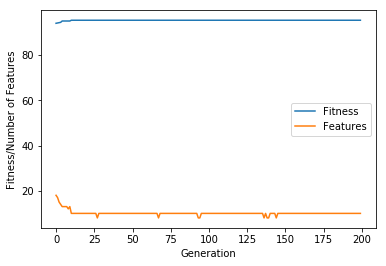

In [46]:
obj.plotFitness()

In [47]:
print(obj.getMaxAccuracySubset())

['Cap-surface', 'bruises?', 'Gill-spacing', 'Gill-size', 'Stalk-root', 'Stalk-surface-above-ring', 'Veil-color', 'Spore-print-color', 'population', 'habitat']


In [48]:
print(obj.maxAccuracy)

0.9537486012681835


In [49]:
print(len(obj.getMaxAccuracySubset()))

10
